<a href="https://colab.research.google.com/github/OscarJVP/predict_health_costs_with_regression_example/blob/main/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.head()

--2023-08-25 01:24:43--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2023-08-25 01:24:43 (87.9 MB/s) - ‘insurance.csv.2’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
dataset.shape

(1338, 7)

In [ ]:
dataset['sex'] = pd.factorize(dataset['sex'])[0]
dataset['smoker'] = pd.factorize(dataset['smoker'])[0]
dataset['region'] = pd.factorize(dataset['region'])[0]
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [ ]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)
print(train_dataset.shape, test_dataset.shape)

(1070, 7) (268, 7)


In [ ]:
train_labels = train_dataset.pop('expenses')

In [ ]:
train_dataset.head()

,age,sex,bmi,children,smoker,region
1067,39,1,42.7,0,1,3
485,31,0,31.1,0,1,3
1062,59,1,41.1,1,0,1
152,32,0,37.1,3,1,3
1256,51,0,36.4,3,1,2


In [ ]:
test_labels = test_dataset.pop('expenses')

In [ ]:
test_dataset.head()

,age,sex,bmi,children,smoker,region
27,55,0,32.8,2,1,2
197,45,0,28.6,2,1,1
104,34,0,27.5,1,1,0
721,53,1,36.6,3,1,0
10,25,1,26.2,0,1,3


In [ ]:
normalizer = layers.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential()
model.add(normalizer)
model.add(layers.Dense(32))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_12 (Normaliza  (None, 6)                13        
 tion)                                                           
                                                                 
 dense_33 (Dense)            (None, 32)                224       
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 270
Trainable params: 257
Non-trainable params: 13
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.08),
              loss='mae',
              metrics=['mae', 'mse'])
model.build()

In [ ]:
history = model.fit(train_dataset,
                    train_labels,
                    validation_split=0.3,
                    shuffle=True,
                    epochs=150)

Epoch 1/150
24/24 [==============================] - 1s 13ms/step - loss: 13875.3721 - mae: 13875.3721 - mse: 351022112.0000 - val_loss: 12048.5439 - val_mae: 12048.5439 - val_mse: 268878720.0000
Epoch 2/150
24/24 [==============================] - 0s 13ms/step - loss: 13570.9717 - mae: 13570.9717 - mse: 341696704.0000 - val_loss: 11557.8262 - val_mae: 11557.8262 - val_mse: 255477888.0000
Epoch 3/150
24/24 [==============================] - 0s 9ms/step - loss: 12765.2725 - mae: 12765.2725 - mse: 317404768.0000 - val_loss: 10541.7891 - val_mae: 10541.7891 - val_mse: 228426144.0000
Epoch 4/150
24/24 [==============================] - 0s 9ms/step - loss: 11389.6992 - mae: 11389.6992 - mse: 279244128.0000 - val_loss: 9025.2061 - val_mae: 9025.2061 - val_mse: 190576400.0000
Epoch 5/150
24/24 [==============================] - 0s 12ms/step - loss: 9483.0166 - mae: 9483.0166 - mse: 224409376.0000 - val_loss: 6927.4082 - val_mae: 6927.4082 - val_mse: 138981984.0000
Epoch 6/150
24/24 [=========

9/9 - 0s - loss: 3374.8374 - mae: 3374.8374 - mse: 46628712.0000 - 49ms/epoch - 5ms/step
Testing set Mean Abs Error: 3374.84 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


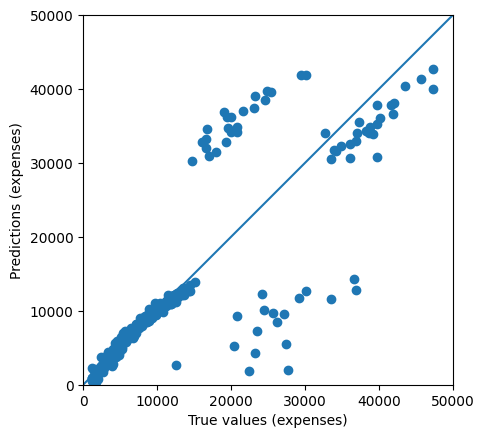

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
